# Import

In [16]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 큐비트의 개수
num_qubits = 3

In [5]:
# 양자 회로 생성
qc = QuantumCircuit(num_qubits)

In [22]:
QuantumCircuit?

Init signature:
QuantumCircuit(
    *regs: 'Register | int | Sequence[Bit]',
    name: 'str | None' = None,
    global_phase: 'ParameterValueType' = 0,
    metadata: 'dict | None' = None,
)
Docstring:     
Create a new circuit.

A circuit is a list of instructions bound to some registers.

Args:
    regs (list(:class:`~.Register`) or list(``int``) or list(list(:class:`~.Bit`))): The
        registers to be included in the circuit.

        * If a list of :class:`~.Register` objects, represents the :class:`.QuantumRegister`
          and/or :class:`.ClassicalRegister` objects to include in the circuit.

          For example:

            * ``QuantumCircuit(QuantumRegister(4))``
            * ``QuantumCircuit(QuantumRegister(4), ClassicalRegister(3))``
            * ``QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(2, 'qr1'))``

        * If a list of ``int``, the amount of qubits and/or classical bits to include in
          the circuit. It can either be a single int for just

In [9]:
# 양자 퓨리에 변환 수행
for qubit in range(num_qubits):
    for j in range(qubit):
        qc.cp(2 * np.pi / float(2**(qubit-j)), j, qubit)
    qc.h(qubit)

In [10]:
# 결과를 얻기 위해 회로를 초기화
qc.barrier()

In [11]:
# 측정 수행
qc.measure_all()

In [15]:
# 양자 회로 시뮬레이션
simulator = Aer.get_backend('aer_simulator')
tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()

<ipython-input-15-048e4a805ac2>:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


In [17]:
# 결과 출력
counts = result.get_counts(qc)

In [20]:
counts

{'100': 252, '110': 235, '010': 264, '000': 273}

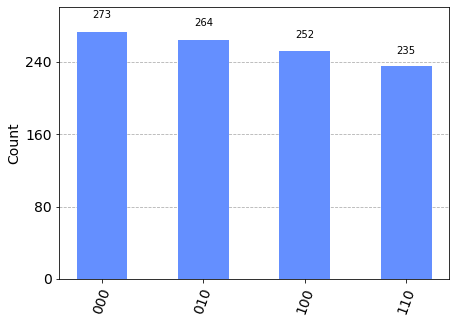

In [21]:
# 결과 시각화
plot_histogram(counts)